In [3]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', rc={"grid.linewidth": 0.3})
pd.set_option('display.max_columns', None)

In [4]:
# Generic function to create labels over bar plot
def create_label(ax,type_of_label):
    rects = ax.patches
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
    
        # Number of points between bar and label. Change to your liking.
        space = 0
        # Vertical alignment for positive values
        va = 'bottom'
    
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
    
        # Use Y value as label and format number with two decimal places
        if type_of_label == 'integer':
            y_value = int(y_value)
            label = "{}".format(y_value)
        else:
            label = "{:.2f}".format(y_value)
    
        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

### Data Understanding

In [5]:
# Read the loan data
loan_data = pd.read_csv('E:\Data Science\EDA Case Study\loan\loan.csv',low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
# Check for the dataset columns and datatypes
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# Check for statistical information
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

It can be seen from the above result that a lot of columns are having NaN values as well as values such as 0. We need to drop these columns during data cleansing. Also for few columns like 'installment','delinq_2yrs' etc. there are outliers since there is a noticeable gap between 75% values and max value.

In [8]:
loan_data.shape

(39717, 111)

In [9]:
# summing up the missing values (column-wise)
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [10]:
# Percentage of missing values column-wise
round(loan_data.isnull().sum()/len(loan_data.index)*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [11]:
# sum it up to check how many rows have all missing values
loan_data.isnull().all(axis=1).sum()

0

In [12]:
# Checking the date columns
loan_data.loc[:,['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,NaN,May-16
1,Dec-11,Apr-99,Apr-13,NaN,Sep-13
2,Dec-11,Nov-01,Jun-14,NaN,May-16
3,Dec-11,Feb-96,Jan-15,NaN,Apr-16
4,Dec-11,Jan-96,May-16,Jun-16,May-16


In [13]:
loan_data.loc[:,['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 5 columns):
issue_d               39717 non-null object
earliest_cr_line      39717 non-null object
last_pymnt_d          39646 non-null object
next_pymnt_d          1140 non-null object
last_credit_pull_d    39715 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


The date columns are not in standard datetime format. We need to convert them to standard datetime format.

### Data Cleaning and Manipulation

In [14]:
# Convert all character columns to UPPER-CASE to avoid any case-sensitive inconsistencies and discrepancies
def to_upper(x):
    try:
        return x.upper()
    except:
        return x
loan_data = loan_data.applymap(to_upper)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 MONTHS,10.65%,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,DEC-11,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/22/11 > I NEED TO UPGRA...,CREDIT_CARD,COMPUTER,860XX,AZ,27.65,0,JAN-85,1,NaN,NaN,3,0,13648,83.70%,9,F,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,JAN-15,171.62,NaN,MAY-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 MONTHS,15.27%,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,DEC-11,CHARGED OFF,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/22/11 > I PLAN TO USE T...,CAR,BIKE,309XX,GA,1.00,0,APR-99,5,NaN,NaN,3,0,1687,9.40%,4,F,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,APR-13,119.66,NaN,SEP-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 MONTHS,15.96%,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,DEC-11,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,NaN,SMALL_BUSINESS,REAL ESTATE BUSINESS,606XX,IL,8.72,0,NOV-01,2,NaN,NaN,2,0,2956,98.50%,10,F,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,JUN-14,649.91,NaN,MAY-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 MONTHS,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,DEC-11,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/21/11 > TO PAY FOR PROP...,OTHER,PERSONEL,917XX,CA,20.00,0,FEB-96,1,35.0,NaN,10,0,5598,21%,37,F,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,JAN-15,357.48,NaN,APR-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [15]:
# Drop any duplicate row if present
loan_data.drop_duplicates(inplace=True)
loan_data.shape

(39717, 111)

In [16]:
# Drop columns with all NaN values
loan_data = loan_data.dropna(axis=1,how='all')
loan_data.shape

(39717, 57)

In [17]:
# Check for rows having more than 5 NaN values
len(loan_data[loan_data.isnull().sum(axis=1) > 5].index)

263

In [18]:
round(loan_data.isnull().sum()/len(loan_data.index)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [19]:
# Drop columns with more than 90% null values
loan_data = loan_data.drop(['next_pymnt_d','mths_since_last_record'],axis=1)
loan_data.shape

(39717, 55)

In [20]:
round(loan_data.isnull().sum()/len(loan_data.index)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [21]:
# Convert date columns to standard datetime format
from datetime import datetime
def convert_to_datetime(in_date):
    try:
        in_date =  '01-' + in_date # Adding a dummy date for the date columns
        return datetime.strptime(in_date,'%d-%b-%y')
    except:
        return in_date

loan_data['issue_d'] = loan_data['issue_d'].apply(convert_to_datetime)
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(convert_to_datetime)
loan_data['last_pymnt_d'] = loan_data['last_pymnt_d'].apply(convert_to_datetime)
loan_data['last_credit_pull_d'] = loan_data['last_credit_pull_d'].apply(convert_to_datetime)

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 MONTHS,10.65%,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/22/11 > I NEED TO UPGRA...,CREDIT_CARD,COMPUTER,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.70%,9,F,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 MONTHS,15.27%,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/22/11 > I PLAN TO USE T...,CAR,BIKE,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.40%,4,F,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 MONTHS,15.96%,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,NaN,SMALL_BUSINESS,REAL ESTATE BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.50%,10,F,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 MONTHS,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/21/11 > TO PAY FOR PROP...,OTHER,PERSONEL,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21%,37,F,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 MONTHS,12.69%,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1 YEAR,RENT,80000.0,SOURCE VERIFIED,2011-12-01,CURRENT,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/21/11 > I PLAN ON COMBI...,OTHER,PERSONAL,972XX,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,53.90%,38,F,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [22]:
# Remove % symbol from int_rate and revol_util columns
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%','')
loan_data['revol_util'] = loan_data['revol_util'].str.replace('%','')
loan_data['int_rate'] = loan_data['int_rate'].astype(float)
loan_data['revol_util'] = loan_data['revol_util'].astype(float)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 MONTHS,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/22/11 > I NEED TO UPGRA...,CREDIT_CARD,COMPUTER,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,F,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 MONTHS,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/22/11 > I PLAN TO USE T...,CAR,BIKE,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,F,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 MONTHS,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,NaN,SMALL_BUSINESS,REAL ESTATE BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,F,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 MONTHS,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/21/11 > TO PAY FOR PROP...,OTHER,PERSONEL,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,F,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 MONTHS,12.69,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1 YEAR,RENT,80000.0,SOURCE VERIFIED,2011-12-01,CURRENT,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/21/11 > I PLAN ON COMBI...,OTHER,PERSONAL,972XX,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,53.9,38,F,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [23]:
# Term is in char format, need to convert it into number
loan_data['term'] = loan_data['term'].str.replace('MONTHS','')
loan_data['term'] = loan_data['term'].astype(float)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/22/11 > I NEED TO UPGRA...,CREDIT_CARD,COMPUTER,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,F,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/22/11 > I PLAN TO USE T...,CAR,BIKE,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,F,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,NaN,SMALL_BUSINESS,REAL ESTATE BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,F,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/21/11 > TO PAY FOR PROP...,OTHER,PERSONEL,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,F,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60.0,12.69,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1 YEAR,RENT,80000.0,SOURCE VERIFIED,2011-12-01,CURRENT,N,HTTPS://LENDINGCLUB.COM/BROWSE/LOANDETAIL.ACTI...,BORROWER ADDED ON 12/21/11 > I PLAN ON COMBI...,OTHER,PERSONAL,972XX,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,53.9,38,F,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [24]:
# Drop irrelevant columns having text-heavy data
loan_data = loan_data.drop(['url','desc','title'],axis=1)
loan_data.shape

(39717, 52)

In [25]:
#Number of unique records for each column
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     27443
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq           95
open_acc                         40
pub_rec                     

In [26]:
# Check for columns with values as 0 only
loan_desc = loan_data.describe()
loan_desc = loan_desc.transpose()
loan_desc[(loan_desc['min'] == 0) & (loan_desc['max'] == 0)]

,count,mean,std,min,25%,50%,75%,max
collections_12_mths_ex_med,39661.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acc_now_delinq,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chargeoff_within_12_mths,39661.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
delinq_amnt,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tax_liens,39678.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Drop columns with only 0 values
loan_data = loan_data.drop(['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)
loan_data.shape

(39717, 47)

In [28]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 47 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null float64
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
pymnt_plan                 39717 non-null object


In [29]:
# Check unique values for each column
loan_data.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  27443
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
pymnt_plan                     1
purpose                       14
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

In [30]:
columns_with_one_unique_value = [k for k,v in loan_data.nunique().to_dict().items() if v==1]
columns_with_one_unique_value

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type']

In [31]:
loan_data = loan_data.drop(columns_with_one_unique_value,axis=1)
loan_data.shape

(39717, 43)

In [32]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,9.294408,0.055065,13382.528086,48.832152,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,4.400282,0.237200,15885.016641,28.332634,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,6.000000,0.000000,3703.000000,25.400000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,12.000000,0.000000,17058.000000,72.400000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


### Data Analysis

In [33]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60.0,12.69,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1 YEAR,RENT,80000.0,SOURCE VERIFIED,2011-12-01,CURRENT,OTHER,972XX,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


In [34]:
loan_data['emp_length'].value_counts()

10+ YEARS    8879
< 1 YEAR     4583
2 YEARS      4388
3 YEARS      4095
4 YEARS      3436
5 YEARS      3282
1 YEAR       3240
6 YEARS      2229
7 YEARS      1773
8 YEARS      1479
9 YEARS      1258
Name: emp_length, dtype: int64

In [35]:
loan_data['loan_status'].value_counts()

FULLY PAID     32950
CHARGED OFF     5627
CURRENT         1140
Name: loan_status, dtype: int64

In [36]:
loan_status_group = pd.DataFrame(loan_data.groupby('loan_status').size()).reset_index().rename(columns={0:'Number of Loans'})
total_num_loans = loan_status_group['Number of Loans'].sum()
loan_status_group['Percentage of Loans'] = round((loan_status_group['Number of Loans']/total_num_loans)*100,2)
loan_status_group

,loan_status,Number of Loans,Percentage of Loans
0,CHARGED OFF,5627,14.17
1,CURRENT,1140,2.87
2,FULLY PAID,32950,82.96


It can be seen that 14% of all the issued loans under consideration has been charged-off and resulted in credit-loss for the company. Need to look into the issue.

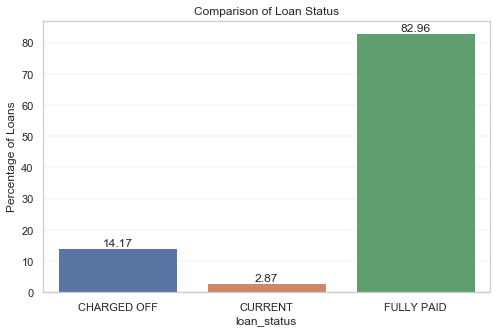

In [37]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=loan_status_group,x='loan_status',y='Percentage of Loans')
ax.set_title('Comparison of Loan Status')
create_label(ax,'float')
plt.show()

In [38]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60.0,12.69,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1 YEAR,RENT,80000.0,SOURCE VERIFIED,2011-12-01,CURRENT,OTHER,972XX,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


In [39]:
loan_status_df = loan_data[loan_data['loan_status'].isin(['CHARGED OFF','FULLY PAID'])]
loan_status_df.head()                                 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,1075269,1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,36000.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.20,0,2004-11-01,3,NaN,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


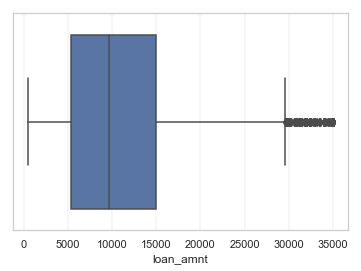

In [40]:
#loan_status_df['loan_amnt'].plot(kind='box')
sns.boxplot(x=loan_status_df['loan_amnt'])

In [41]:
loan_purpose_df = pd.DataFrame(loan_status_df.groupby(['purpose','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_purpose_df.head()

,purpose,loan_status,Number of Applicants
0,CAR,CHARGED OFF,160
1,CAR,FULLY PAID,1339
2,CREDIT_CARD,CHARGED OFF,542
3,CREDIT_CARD,FULLY PAID,4485
4,DEBT_CONSOLIDATION,CHARGED OFF,2767


In [42]:
loan_purpose_transpose_df = pd.pivot_table(data=loan_purpose_df,columns='loan_status',values='Number of Applicants',index='purpose').reset_index().rename_axis(None,axis=1)
#loan_purpose_transpose_df = loan_purpose_transpose_df.drop('CURRENT',axis=1)
loan_purpose_transpose_df['TOTAL'] = loan_purpose_transpose_df['CHARGED OFF'] + loan_purpose_transpose_df['FULLY PAID']
loan_purpose_transpose_df['FRAUD PERCENTAGE'] = loan_purpose_transpose_df['CHARGED OFF']/loan_purpose_transpose_df['TOTAL']*100
loan_purpose_transpose_df = loan_purpose_transpose_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_purpose_transpose_df

,purpose,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
11,SMALL_BUSINESS,475,1279,1754,27.080958
10,RENEWABLE_ENERGY,19,83,102,18.627451
3,EDUCATIONAL,56,269,325,17.230769
9,OTHER,633,3232,3865,16.377749
5,HOUSE,59,308,367,16.076294
8,MOVING,92,484,576,15.972222
7,MEDICAL,106,575,681,15.565345
2,DEBT_CONSOLIDATION,2767,15288,18055,15.325395
12,VACATION,53,322,375,14.133333
4,HOME_IMPROVEMENT,347,2528,2875,12.069565


Although the highest number of loan applications are received for debt consolidation,it is clear that the highest percentage of defaulters state loan purpose as Small Business.
27% of all loans taken for small businesses result in credit loss to the company.

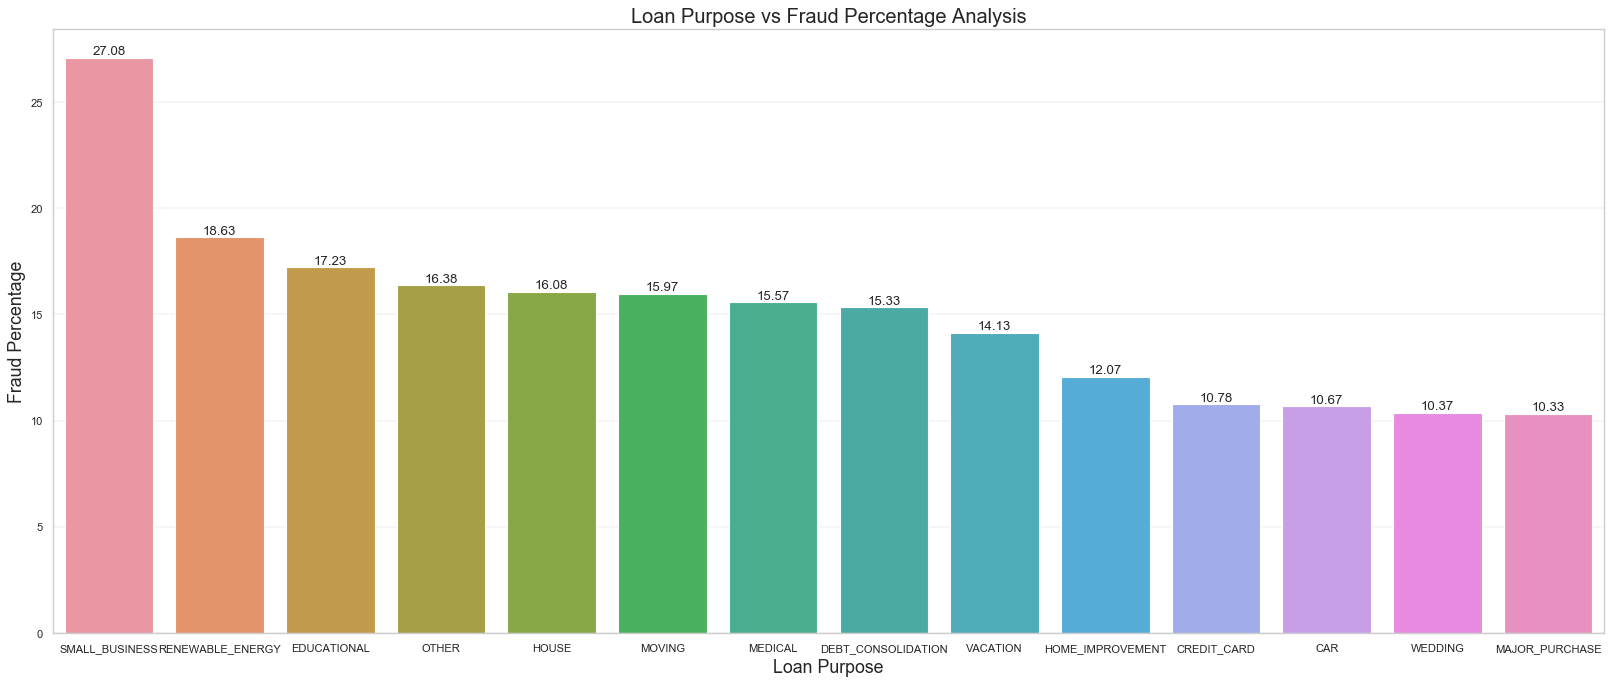

In [43]:
plt.figure(figsize=(25,10),dpi=80)
ax = sns.barplot(data=loan_purpose_transpose_df,x='purpose',y='FRAUD PERCENTAGE')
ax.set_title('Loan Purpose vs Fraud Percentage Analysis',fontsize = 18)
ax.set_xlabel('Loan Purpose',fontsize = 16)
ax.set_ylabel('Fraud Percentage',fontsize = 16)
create_label(ax,'float')
ax.tick_params(labelsize=10)
plt.show()

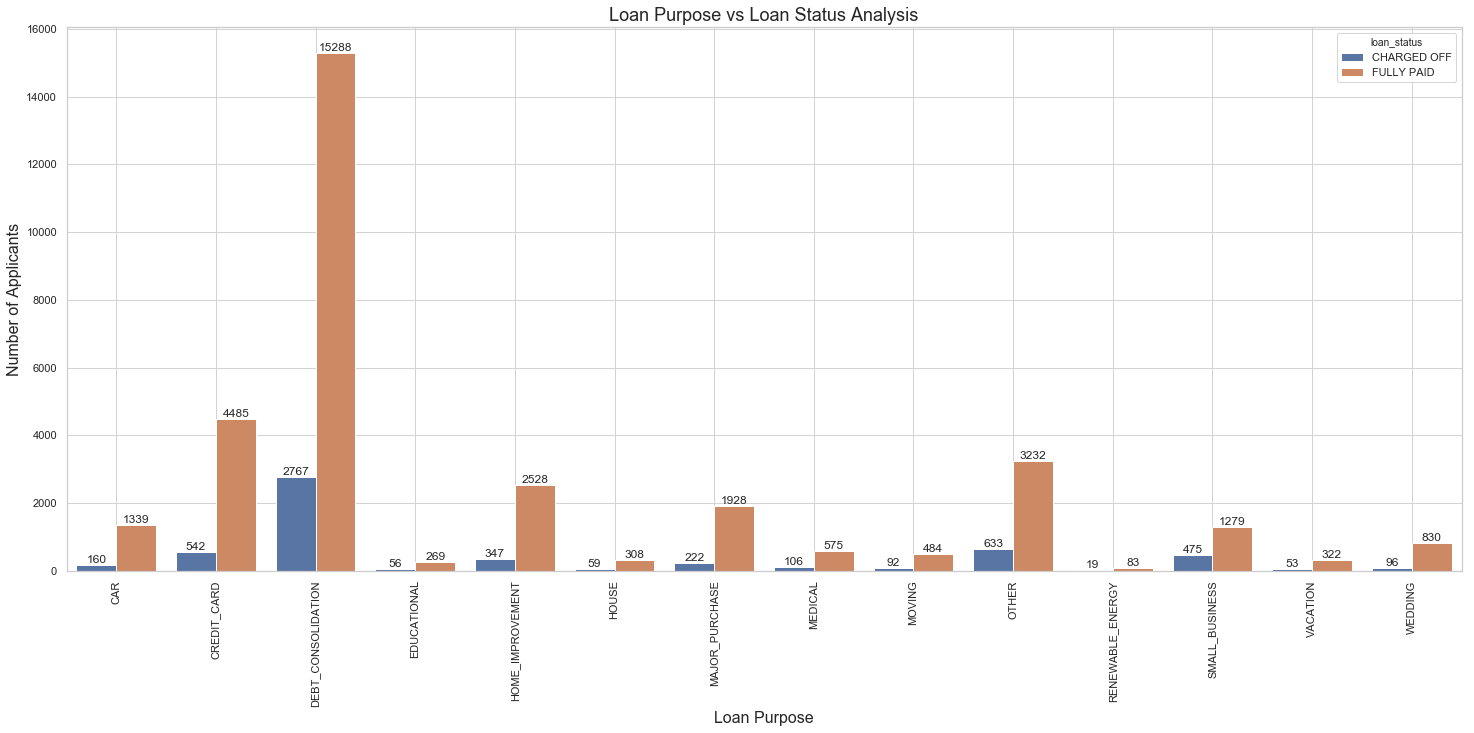

In [47]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data=loan_purpose_df,x='purpose',y='Number of Applicants',hue='loan_status')
ax.set_title('Loan Purpose vs Loan Status Analysis',fontsize = 18)
ax.set_xlabel('Loan Purpose',fontsize = 16)
ax.set_ylabel('Number of Applicants',fontsize = 16)
create_label(ax,'integer')
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

<Figure size 720x720 with 0 Axes>

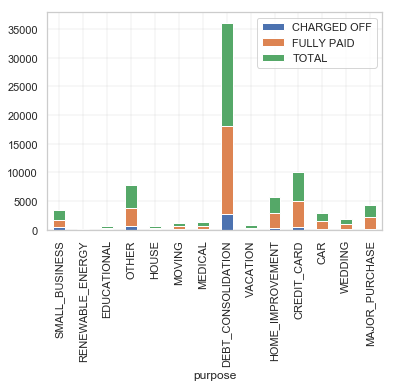

In [48]:
plt.figure(figsize=(10,10))
ax = loan_purpose_transpose_df.set_index('purpose').loc[:,'CHARGED OFF':'TOTAL'].plot(kind='bar',stacked=True)
plt.show()

In [49]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60.0,12.69,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1 YEAR,RENT,80000.0,SOURCE VERIFIED,2011-12-01,CURRENT,OTHER,972XX,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


In [50]:
loan_data['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [51]:
'''
def assign_id(status):
    if status == 'CHARGED OFF':
        return 0
    elif status == 'FULLY PAID':
        return 1
    else:
        return -1
loan_data['Loan Status ID'] = loan_data['loan_status'].apply(assign_id)
loan_data.head()
'''

"\ndef assign_id(status):\n    if status == 'CHARGED OFF':\n        return 0\n    elif status == 'FULLY PAID':\n        return 1\n    else:\n        return -1\nloan_data['Loan Status ID'] = loan_data['loan_status'].apply(assign_id)\nloan_data.head()\n"

In [52]:
loan_data.corr().head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.218589,0.078831,0.086587,0.008731,0.095983,-0.008644,-0.042378,0.117193,0.020388,-0.019440,0.008763,0.094846,0.042149,0.180619,0.180591,0.140045,0.220838,0.112213,0.172856,-0.055082,0.033426,-0.013359,0.122365,-0.009505
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.234265,0.074725,0.081025,0.009380,0.096963,-0.008119,-0.047086,0.122963,0.017928,-0.018721,0.005113,0.093118,0.044374,0.170743,0.170706,0.139975,0.229307,0.112168,0.173234,-0.057750,0.031565,-0.015155,0.123627,-0.008769
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.361036,0.309415,0.930288,0.271149,0.066439,-0.031864,0.009229,0.014871,0.177168,-0.051236,0.317597,0.066149,0.256442,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.340510,0.312619,0.956159,0.266965,0.066283,-0.032355,0.009259,0.016359,0.175530,-0.052169,0.310392,0.069962,0.250589,0.194941,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.360747,0.306657,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.071924,0.163027,-0.053214,0.290797,0.074939,0.242854,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746


In [53]:
loan_status_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,1075269,1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,36000.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.20,0,2004-11-01,3,NaN,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


#### Anaysis of applicant's income verification status versus Loan Status

In [54]:
loan_verification_df = pd.DataFrame(loan_status_df.groupby(['verification_status','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_verification_df

,verification_status,loan_status,Number of Applicants
0,NOT VERIFIED,CHARGED OFF,2142
1,NOT VERIFIED,FULLY PAID,14552
2,SOURCE VERIFIED,CHARGED OFF,1434
3,SOURCE VERIFIED,FULLY PAID,8243
4,VERIFIED,CHARGED OFF,2051
5,VERIFIED,FULLY PAID,10155


In [55]:
loan_verification_transpose_df = pd.pivot_table(data=loan_verification_df,columns='loan_status',values='Number of Applicants',index='verification_status').reset_index().rename_axis(None,axis=1)
loan_verification_transpose_df['TOTAL'] = loan_verification_transpose_df['CHARGED OFF'] + loan_verification_transpose_df['FULLY PAID']
loan_verification_transpose_df['FRAUD PERCENTAGE'] = loan_verification_transpose_df['CHARGED OFF']/loan_verification_transpose_df['TOTAL']*100
loan_verification_transpose_df = loan_verification_transpose_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_verification_transpose_df

,verification_status,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
2,VERIFIED,2051,10155,12206,16.803212
1,SOURCE VERIFIED,1434,8243,9677,14.818642
0,NOT VERIFIED,2142,14552,16694,12.830957


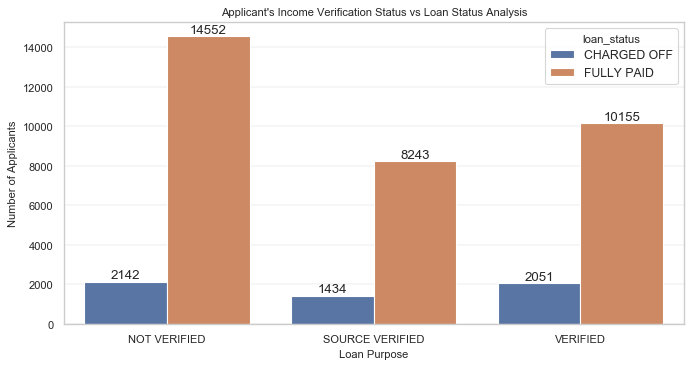

In [56]:
plt.figure(figsize=(10,5),dpi=80)
ax = sns.barplot(data=loan_verification_df,x='verification_status',y='Number of Applicants',hue='loan_status')
ax.set_title("Applicant's Income Verification Status vs Loan Status Analysis",fontsize = 10)
ax.tick_params(labelsize=10)
ax.set_xlabel('Loan Purpose',fontsize = 10)
ax.set_ylabel('Number of Applicants',fontsize = 10)
create_label(ax,'integer')
plt.show()


LC has incorporated a system to review the income source of the loan applicant. 
From the plot it is clear that the highest number of applications received not verified. 
However, from the table fraud percentage it is evident that applications that have the income verified or source verified have a higher chance of leading to credit loss.
LC must appraise and analyze the system implemented for verification.

In [57]:
loan_status_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,1075269,1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,36000.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.20,0,2004-11-01,3,NaN,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


#### Anaysis of applicant's Loan Term status versus Loan Status

In [58]:
loan_term_df = pd.DataFrame(loan_status_df.groupby(['term','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_term_df

,term,loan_status,Number of Applicants
0,36.0,CHARGED OFF,3227
1,36.0,FULLY PAID,25869
2,60.0,CHARGED OFF,2400
3,60.0,FULLY PAID,7081


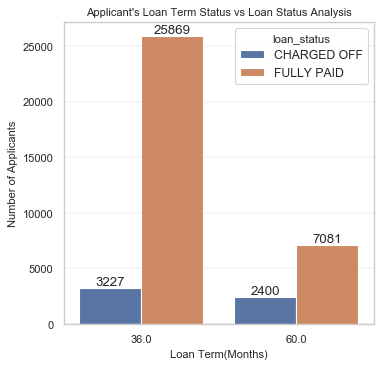

In [59]:
plt.figure(figsize=(5,5),dpi=80)
ax = sns.barplot(data=loan_term_df,x='term',y='Number of Applicants',hue='loan_status')
ax.set_title("Applicant's Loan Term Status vs Loan Status Analysis",fontsize = 10)
ax.tick_params(labelsize=10)
ax.set_xlabel('Loan Term(Months)',fontsize = 10)
ax.set_ylabel('Number of Applicants',fontsize = 10)
create_label(ax,'integer')
plt.show()

In [60]:
loan_term_transpose_df = pd.pivot_table(data=loan_term_df,columns='loan_status',values='Number of Applicants',index='term').reset_index().rename_axis(None,axis=1)
loan_term_transpose_df['TOTAL'] = loan_term_transpose_df['CHARGED OFF'] + loan_term_transpose_df['FULLY PAID']
loan_term_transpose_df['FRAUD PERCENTAGE'] = loan_term_transpose_df['CHARGED OFF']/loan_term_transpose_df['TOTAL']*100
loan_term_transpose_df = loan_term_transpose_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_term_transpose_df

,term,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
1,60.0,2400,7081,9481,25.313785
0,36.0,3227,25869,29096,11.090872


Majority of loans are issue for a duration of 36 months. However, from the table it is clear that a loans issued for a term of 60 months has a significantly higher chance of resulting in credit loss.

#### Applicant Residence State vs Loan Status Analysis

In [61]:
loan_residence_df = pd.DataFrame(loan_status_df.groupby(['addr_state','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_residence_df


,addr_state,loan_status,Number of Applicants
0,AK,CHARGED OFF,15
1,AK,FULLY PAID,63
2,AL,CHARGED OFF,54
3,AL,FULLY PAID,381
4,AR,CHARGED OFF,27
5,AR,FULLY PAID,208
6,AZ,CHARGED OFF,123
7,AZ,FULLY PAID,726
8,CA,CHARGED OFF,1125
9,CA,FULLY PAID,5824


In [62]:
loan_residence_pvt_df = pd.pivot_table(data=loan_residence_df,columns='loan_status',values='Number of Applicants',index='addr_state').reset_index().rename_axis(None,axis=1)
loan_residence_pvt_df
loan_residence_pvt_df['TOTAL'] = loan_residence_pvt_df['CHARGED OFF'] + loan_residence_pvt_df['FULLY PAID']
loan_residence_pvt_df['FRAUD PERCENTAGE'] = loan_residence_pvt_df['CHARGED OFF']/loan_residence_pvt_df['TOTAL']*100
loan_residence_pvt_df = loan_residence_pvt_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_residence_pvt_df

,addr_state,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
28,NE,3.0,2.0,5.0,60.000000
32,NV,108.0,371.0,479.0,22.546973
40,SD,12.0,50.0,62.0,19.354839
0,AK,15.0,63.0,78.0,19.230769
9,FL,504.0,2277.0,2781.0,18.122977
24,MO,114.0,556.0,670.0,17.014925
11,HI,28.0,138.0,166.0,16.867470
13,ID,1.0,5.0,6.0,16.666667
31,NM,30.0,153.0,183.0,16.393443
36,OR,71.0,364.0,435.0,16.321839


It is evident that state with code NE has the highest fraud percentage rate, but the number of applicants is as few as 5. Hence, we drop that row.

In [63]:
loan_residence_pvt_df=loan_residence_pvt_df[~((loan_residence_pvt_df['addr_state']=='NE')&(loan_residence_pvt_df['addr_state']=='IA')&(loan_residence_pvt_df['addr_state']=='IN')&(loan_residence_pvt_df['addr_state']=='ME'))]
loan_residence_pvt_df

,addr_state,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
28,NE,3.0,2.0,5.0,60.000000
32,NV,108.0,371.0,479.0,22.546973
40,SD,12.0,50.0,62.0,19.354839
0,AK,15.0,63.0,78.0,19.230769
9,FL,504.0,2277.0,2781.0,18.122977
24,MO,114.0,556.0,670.0,17.014925
11,HI,28.0,138.0,166.0,16.867470
13,ID,1.0,5.0,6.0,16.666667
31,NM,30.0,153.0,183.0,16.393443
36,OR,71.0,364.0,435.0,16.321839


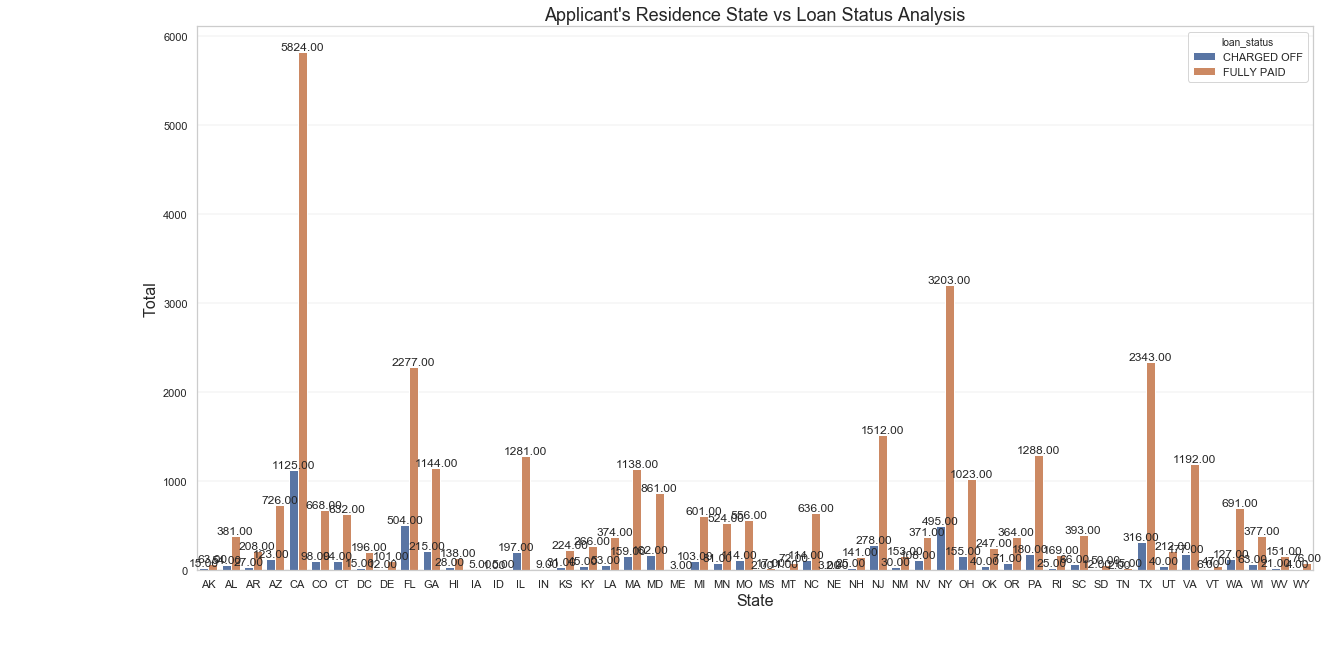

In [64]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=loan_residence_df,x='addr_state',y='Number of Applicants',hue='loan_status')
ax.set_title("Applicant's Residence State vs Loan Status Analysis",fontsize = 18)
ax.set_xlabel('State',fontsize = 16)
ax.set_ylabel('Total',fontsize = 16)
create_label(ax,'float')
plt.show()

Text(0.5,0,'group')

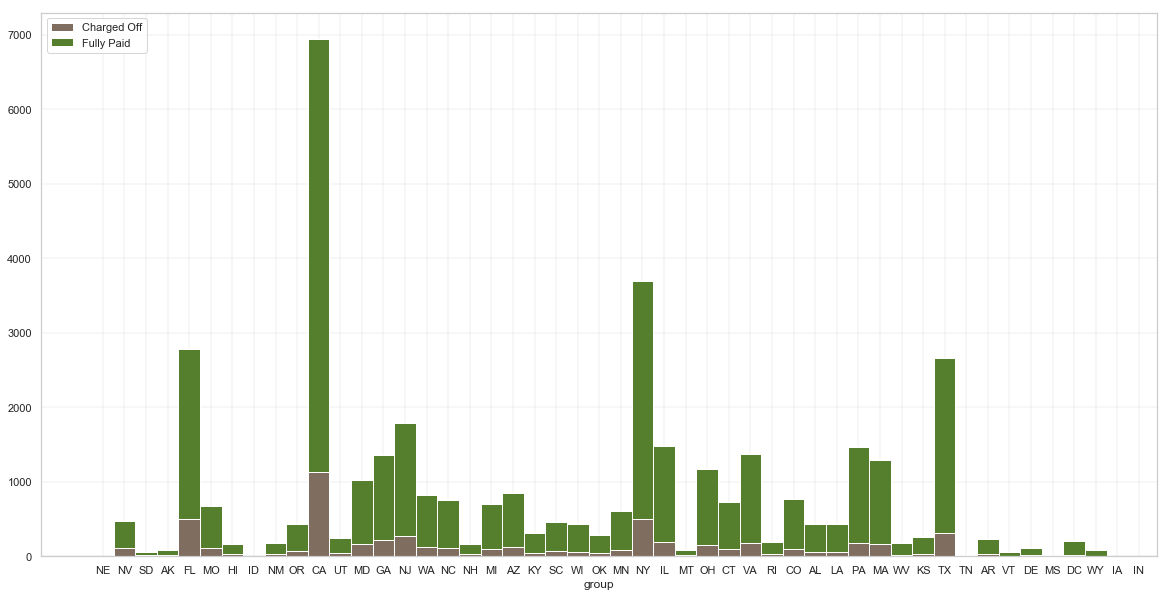

In [100]:
import matplotlib.pyplot as plt
# Create brown bars
plt.figure(figsize=(20,10))

Charged_Off=loan_residence_pvt_df['CHARGED OFF']
Fully_Paid= loan_residence_pvt_df['FULLY PAID']
Status=['Charged Off','Fully Paid']
plt.bar(loan_residence_pvt_df['addr_state'],Charged_Off , color='#7f6d5f', edgecolor='white', width=1)
# Create green bars (middle), on top of the firs ones
plt.bar(loan_residence_pvt_df['addr_state'],Fully_Paid, bottom=loan_residence_pvt_df['CHARGED OFF'], color='#557f2d', edgecolor='white', width=1)
# Custom X axis
plt.legend(Status)
plt.xlabel("group")



#### Loan Status vs Loan Grade Analysis

In [102]:
loan_status_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,1075269,1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,36000.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.20,0,2004-11-01,3,NaN,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


In [104]:
loan_grade_df = pd.DataFrame(loan_status_df.groupby(['grade','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_grade_df

,grade,loan_status,Number of Applicants
0,A,CHARGED OFF,602
1,A,FULLY PAID,9443
2,B,CHARGED OFF,1425
3,B,FULLY PAID,10250
4,C,CHARGED OFF,1347
5,C,FULLY PAID,6487
6,D,CHARGED OFF,1118
7,D,FULLY PAID,3967
8,E,CHARGED OFF,715
9,E,FULLY PAID,1948


In [105]:
loan_grade_pvt_df = pd.pivot_table(data=loan_grade_df,columns='loan_status',values='Number of Applicants',index='grade').reset_index().rename_axis(None,axis=1)
loan_grade_pvt_df['TOTAL'] = loan_grade_pvt_df['CHARGED OFF'] + loan_grade_pvt_df['FULLY PAID']
loan_grade_pvt_df['FRAUD PERCENTAGE'] = loan_grade_pvt_df['CHARGED OFF']/loan_grade_pvt_df['TOTAL']*100
loan_grade_pvt_df = loan_grade_pvt_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_grade_pvt_df

,grade,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
6,G,101,198,299,33.779264
5,F,319,657,976,32.684426
4,E,715,1948,2663,26.849418
3,D,1118,3967,5085,21.986234
2,C,1347,6487,7834,17.194281
1,B,1425,10250,11675,12.205567
0,A,602,9443,10045,5.993031


It is clear that the fraud percentage is highest in grade G and lowest in grade A. But, the number of applicants in G is the least too. Hence, we have to further analyze the dataset. 

Text(0.5,0,'group')

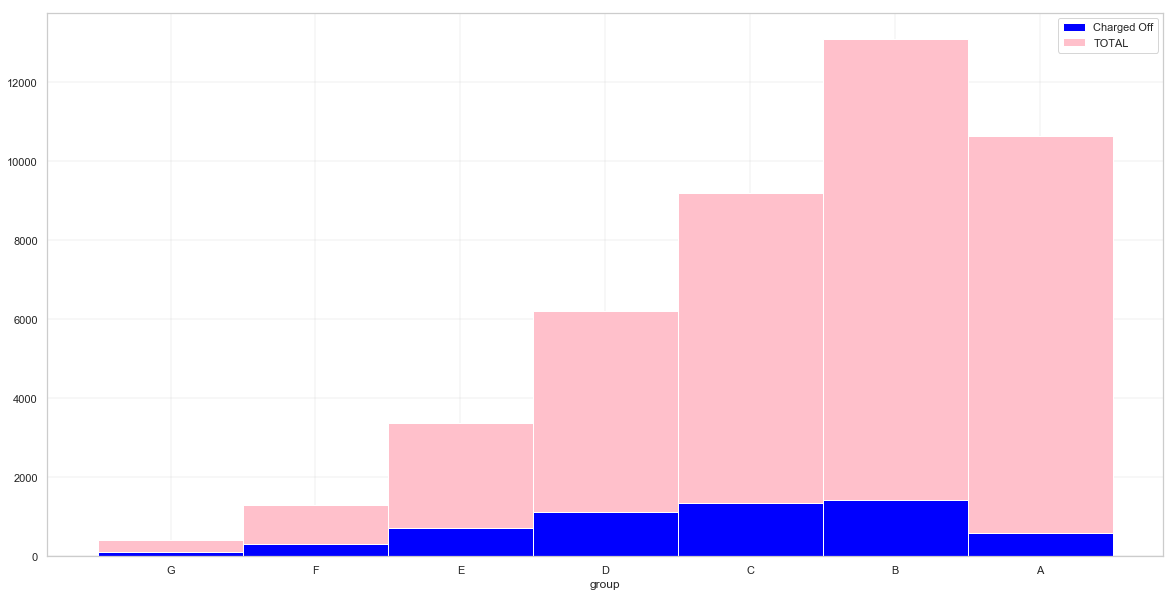

In [110]:
import matplotlib.pyplot as plt
# Create brown bars
plt.figure(figsize=(20,10))

Charged_Off=loan_grade_pvt_df['CHARGED OFF']
TOTAL= loan_grade_pvt_df['TOTAL']
Status=['Charged Off','TOTAL']
plt.bar(loan_grade_pvt_df['grade'],Charged_Off , color='blue', edgecolor='white', width=1)
# Create green bars (middle), on top of the firs ones
plt.bar(loan_grade_pvt_df['grade'],TOTAL, bottom=loan_grade_pvt_df['CHARGED OFF'], color='pink', edgecolor='white', width=1)
# Custom X axis
plt.legend(Status)
plt.xlabel("group")

#### Loan Subgrade VS Loan Status Analysis

In [111]:
loan_subgrade_df = pd.DataFrame(loan_status_df.groupby(['sub_grade','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_subgrade_df

,sub_grade,loan_status,Number of Applicants
0,A1,CHARGED OFF,30
1,A1,FULLY PAID,1109
2,A2,CHARGED OFF,74
3,A2,FULLY PAID,1434
4,A3,CHARGED OFF,103
5,A3,FULLY PAID,1707
6,A4,CHARGED OFF,178
7,A4,FULLY PAID,2695
8,A5,CHARGED OFF,217
9,A5,FULLY PAID,2498


In [112]:
loan_subgrade_pvt_df = pd.pivot_table(data=loan_subgrade_df,columns='loan_status',values='Number of Applicants',index='sub_grade').reset_index().rename_axis(None,axis=1)
loan_subgrade_pvt_df['TOTAL'] = loan_subgrade_pvt_df['CHARGED OFF'] + loan_subgrade_pvt_df['FULLY PAID']
loan_subgrade_pvt_df['FRAUD PERCENTAGE'] = loan_subgrade_pvt_df['CHARGED OFF']/loan_subgrade_pvt_df['TOTAL']*100
loan_subgrade_pvt_df = loan_subgrade_pvt_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_subgrade_pvt_df

,sub_grade,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
29,F5,54,59,113,47.787611
32,G3,19,26,45,42.222222
31,G2,28,49,77,36.363636
28,F4,53,98,151,35.099338
34,G5,10,19,29,34.482759
30,G1,31,63,94,32.978723
26,F2,70,163,233,30.042918
25,F1,91,214,305,29.836066
23,E4,126,298,424,29.716981
27,F3,51,123,174,29.310345


Text(0.5,0,'group')

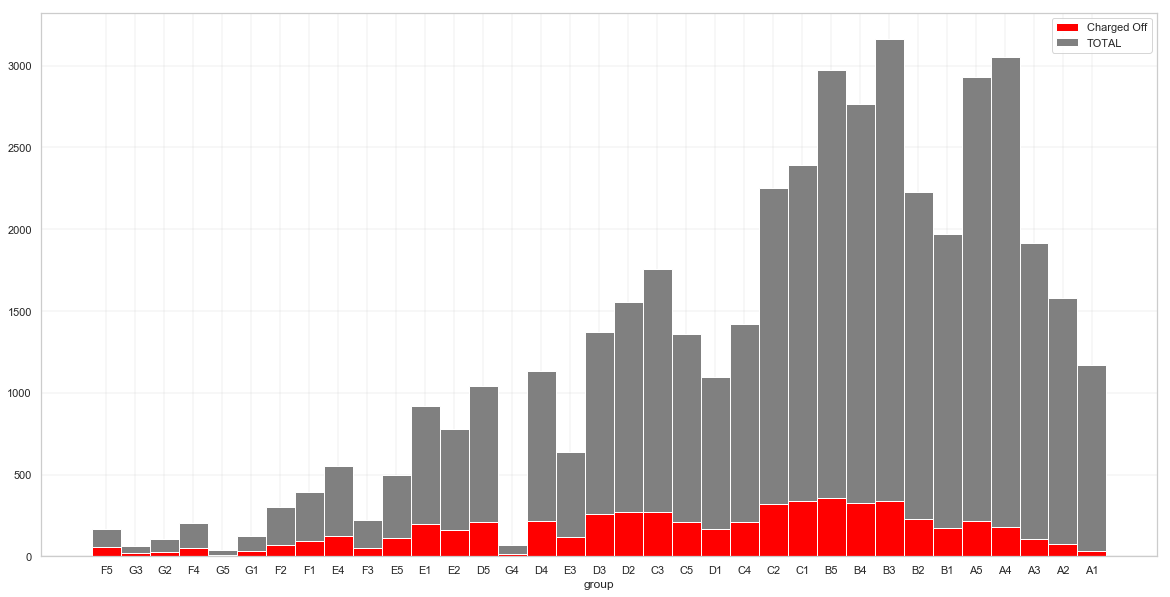

In [115]:
import matplotlib.pyplot as plt
# Create brown bars
plt.figure(figsize=(20,10))

Charged_Off=loan_subgrade_pvt_df['CHARGED OFF']
TOTAL= loan_subgrade_pvt_df['TOTAL']
Status=['Charged Off','TOTAL']
plt.bar(loan_subgrade_pvt_df['sub_grade'],Charged_Off , color='red', edgecolor='white', width=1)
# Create green bars (middle), on top of the firs ones
plt.bar(loan_subgrade_pvt_df['sub_grade'],TOTAL, bottom=loan_subgrade_pvt_df['CHARGED OFF'], color='grey', edgecolor='white', width=1)
# Custom X axis
plt.legend(Status)
plt.xlabel("group")

It is visible that there is a steep decrease in credit loss for grade A from A5 to A1. Same is applicable for grade B nearly. But for other grades, there is random distribution of credit-loss. 

#### Loan Status vs Home Ownership Analysis

In [116]:
loan_status_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,1075269,1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,36000.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.20,0,2004-11-01,3,NaN,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


In [117]:
loan_home_df = pd.DataFrame(loan_status_df.groupby(['home_ownership','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_home_df

,home_ownership,loan_status,Number of Applicants
0,MORTGAGE,CHARGED OFF,2327
1,MORTGAGE,FULLY PAID,14694
2,NONE,FULLY PAID,3
3,OTHER,CHARGED OFF,18
4,OTHER,FULLY PAID,80
5,OWN,CHARGED OFF,443
6,OWN,FULLY PAID,2532
7,RENT,CHARGED OFF,2839
8,RENT,FULLY PAID,15641


In [118]:
loan_home_pvt_df = pd.pivot_table(data=loan_home_df,columns='loan_status',values='Number of Applicants',index='home_ownership').reset_index().rename_axis(None,axis=1)
loan_home_pvt_df['TOTAL'] = loan_home_pvt_df['CHARGED OFF'] + loan_home_pvt_df['FULLY PAID']
loan_home_pvt_df['FRAUD PERCENTAGE'] = loan_home_pvt_df['CHARGED OFF']/loan_home_pvt_df['TOTAL']*100
loan_home_pvt_df = loan_home_pvt_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_home_pvt_df

,home_ownership,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
2,OTHER,18.0,80.0,98.0,18.367347
4,RENT,2839.0,15641.0,18480.0,15.362554
3,OWN,443.0,2532.0,2975.0,14.890756
0,MORTGAGE,2327.0,14694.0,17021.0,13.671347
1,NONE,NaN,3.0,NaN,NaN


In [120]:
loan_home_pvt_df=loan_home_pvt_df[~(loan_home_pvt_df['home_ownership']=='NONE')]
loan_home_pvt_df

,home_ownership,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
2,OTHER,18.0,80.0,98.0,18.367347
4,RENT,2839.0,15641.0,18480.0,15.362554
3,OWN,443.0,2532.0,2975.0,14.890756
0,MORTGAGE,2327.0,14694.0,17021.0,13.671347


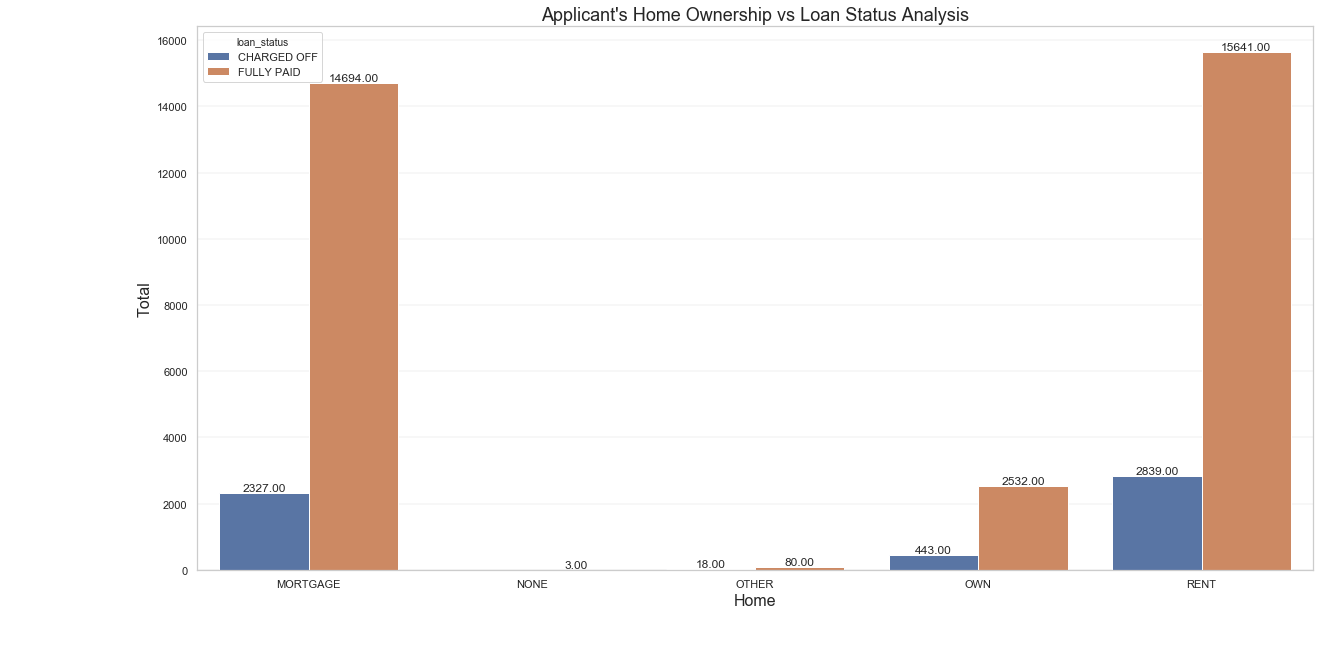

In [121]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=loan_home_df,x='home_ownership',y='Number of Applicants',hue='loan_status')
ax.set_title("Applicant's Home Ownership vs Loan Status Analysis",fontsize = 18)
ax.set_xlabel('Home',fontsize = 16)
ax.set_ylabel('Total',fontsize = 16)
create_label(ax,'float')
plt.show()

People having RENT-ed home ownership is the maximum number of loan applicants. The defaulted count is also the highest for them.

Text(0.5,0,'group')

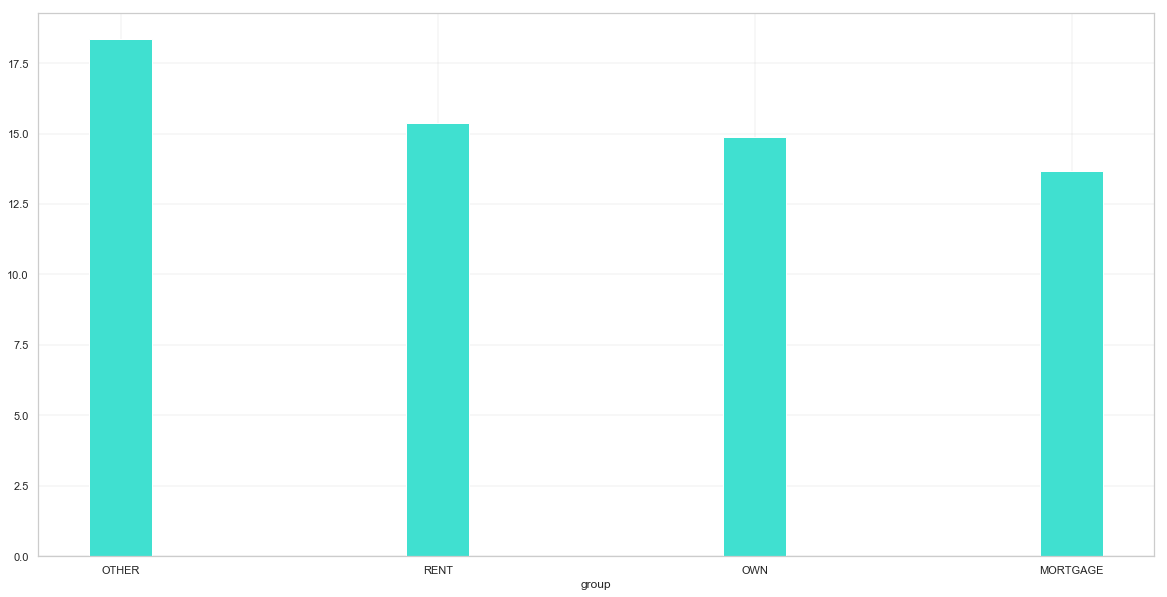

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

Fraud= loan_home_pvt_df['FRAUD PERCENTAGE']

plt.bar(loan_home_pvt_df['home_ownership'],Fraud , color='turquoise', edgecolor='white', width=0.2)
# Custom X axis
plt.xlabel("group")

The fraud percentage is the highest for those whose ownership is not mentioned and classified as others.

#### Loan Status vs Employment Title

In [133]:
loan_status_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,1075269,1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,36000.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.20,0,2004-11-01,3,NaN,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


In [134]:
loan_emptitle_df = pd.DataFrame(loan_status_df.groupby(['emp_title','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_emptitle_df

,emp_title,loan_status,Number of Applicants
0,OLD PALM INC,FULLY PAID,1
1,BROCADE COMMUNICATIONS,FULLY PAID,1
2,CENTURYLINK,FULLY PAID,1
3,DEPARTMENT OF HOMELAND SECURITY,FULLY PAID,1
4,"DOWN TO EARTH DISTRIBUTORS, INC.",FULLY PAID,1
5,"PLAID, INC.",FULLY PAID,1
6,U.S. DEPT. OF HOMELAND SECURITY,FULLY PAID,1
7,$260M '06 VINTAGE TECHNOLOGY VENTURE CAPITAL FIRM,FULLY PAID,1
8,(COLLABORATIVE) ABBOTT NUTRITION INTL,FULLY PAID,1
9,(SELF) CASTLEFORTE GROUP,CHARGED OFF,1


In [135]:
loan_emptitle_pvt_df = pd.pivot_table(data=loan_emptitle_df,columns='loan_status',values='Number of Applicants',index='emp_title').reset_index().rename_axis(None,axis=1)
loan_emptitle_pvt_df['TOTAL'] = loan_emptitle_pvt_df['CHARGED OFF'] + loan_emptitle_pvt_df['FULLY PAID']
loan_emptitle_pvt_df['FRAUD PERCENTAGE'] = loan_emptitle_pvt_df['CHARGED OFF']/loan_emptitle_pvt_df['TOTAL']*100
loan_emptitle_pvt_df = loan_emptitle_pvt_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_emptitle_pvt_df

,emp_title,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
13604,LEVEL 3 COMMUNICATIONS,4.0,1.0,5.0,80.000000
24489,UNITED NATIONS,3.0,1.0,4.0,75.000000
226,ABERCROMBIE & FITCH,3.0,1.0,4.0,75.000000
7519,DYNCORP INTERNATIONAL,3.0,1.0,4.0,75.000000
6874,DEPT OF THE NAVY,2.0,1.0,3.0,66.666667
16405,NEWMARK KNIGHT FRANK,2.0,1.0,3.0,66.666667
20615,SECURITAS SECURITY,2.0,1.0,3.0,66.666667
18815,PROMETRIC,2.0,1.0,3.0,66.666667
15817,MTA,2.0,1.0,3.0,66.666667
24161,TYSON,2.0,1.0,3.0,66.666667


#### Length Of Employment vs Loan Status Analysis

In [136]:
loan_emplen_df = pd.DataFrame(loan_status_df.groupby(['emp_length','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_emplen_df

,emp_length,loan_status,Number of Applicants
0,1 YEAR,CHARGED OFF,456
1,1 YEAR,FULLY PAID,2713
2,10+ YEARS,CHARGED OFF,1331
3,10+ YEARS,FULLY PAID,7157
4,2 YEARS,CHARGED OFF,567
5,2 YEARS,FULLY PAID,3724
6,3 YEARS,CHARGED OFF,555
7,3 YEARS,FULLY PAID,3457
8,4 YEARS,CHARGED OFF,462
9,4 YEARS,FULLY PAID,2880


In [137]:
loan_emplen_pvt_df = pd.pivot_table(data=loan_emplen_df,columns='loan_status',values='Number of Applicants',index='emp_length').reset_index().rename_axis(None,axis=1)
loan_emplen_pvt_df['TOTAL'] = loan_emplen_pvt_df['CHARGED OFF'] + loan_emplen_pvt_df['FULLY PAID']
loan_emplen_pvt_df['FRAUD PERCENTAGE'] = loan_emplen_pvt_df['CHARGED OFF']/loan_emplen_pvt_df['TOTAL']*100
loan_emplen_pvt_df = loan_emplen_pvt_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_emplen_pvt_df

,emp_length,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
1,10+ YEARS,1331,7157,8488,15.680961
7,7 YEARS,263,1448,1711,15.371128
0,1 YEAR,456,2713,3169,14.389397
5,5 YEARS,458,2736,3194,14.339386
10,< 1 YEAR,639,3869,4508,14.174800
6,6 YEARS,307,1861,2168,14.160517
8,8 YEARS,203,1232,1435,14.146341
3,3 YEARS,555,3457,4012,13.833500
4,4 YEARS,462,2880,3342,13.824057
2,2 YEARS,567,3724,4291,13.213703


Text(0.5,0,'group')

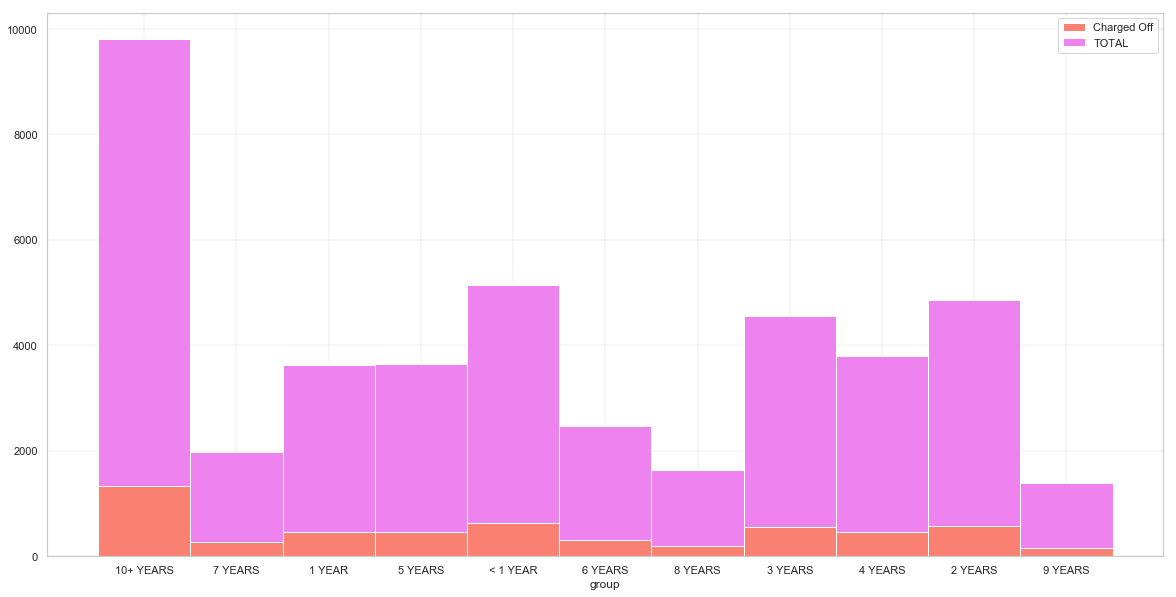

In [148]:
import matplotlib.pyplot as plt
# Create brown bars
plt.figure(figsize=(20,10))

Charged_Off=loan_emplen_pvt_df['CHARGED OFF']
TOTAL= loan_emplen_pvt_df['TOTAL']
Status=['Charged Off','TOTAL']
plt.bar(loan_emplen_pvt_df['emp_length'],Charged_Off , color='salmon', edgecolor='white', width=1)
# Create green bars (middle), on top of the firs ones
plt.bar(loan_emplen_pvt_df['emp_length'],TOTAL, bottom=Charged_Off, color='violet', edgecolor='white', width=1)
# Custom X axis
plt.legend(Status)
plt.xlabel("group")

The applicants working more than 10 years apply for loan the most number of times and are likely to deafult the most too. The applicants working less than 1 year is likely to default more than the rest.

Text(0.5,0,'group')

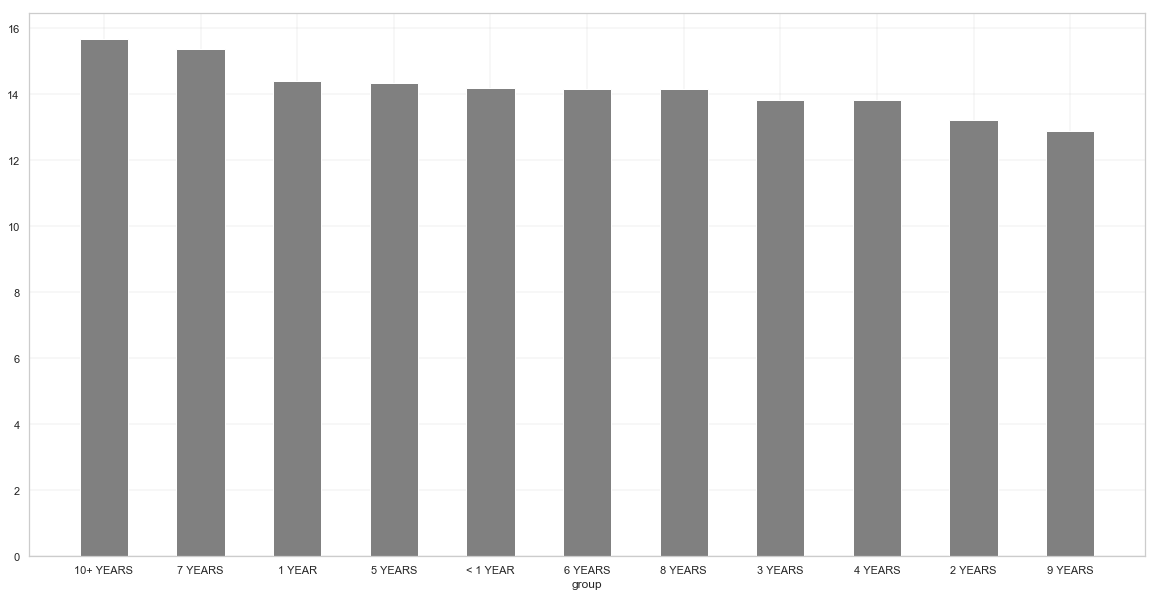

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

Fraud= loan_emplen_pvt_df['FRAUD PERCENTAGE']

plt.bar(loan_emplen_pvt_df['emp_length'],Fraud , color='grey', edgecolor='white', width=0.5)
# Custom X axis
plt.xlabel("group")

Applicants working more than 10yrs have the highest default rate. This may be due to the dataset contain employees nearer to the time of retirement and are more likely to deafult.

#### Annual Income vs Loan Status Analysis

In [152]:
loan_status_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,24000.0,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000.0,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,12252.0,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,1075269,1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,36000.0,SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.20,0,2004-11-01,3,NaN,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


In [172]:
loan_status_df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

The 75th percentile is 82k but max is 60lakhs. Hence, 60lakh is an outlier. 

In [171]:
loan_income_df = pd.DataFrame(loan_status_df.groupby(['annual_inc','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_income_df['Status']=''
loan_income_df.loc[(loan_income_df['annual_inc']>=4000) & (loan_income_df['annual_inc']<=20000),'Status']='less than 20,000'
loan_income_df.loc[(loan_income_df['annual_inc']>20000) & (loan_income_df['annual_inc']<=400000),'Status']='20,000-40000'
loan_income_df.loc[(loan_income_df['annual_inc']>40000) & (loan_income_df['annual_inc']<=60000),'Status']='40,000-60,000'
loan_income_df.loc[(loan_income_df['annual_inc']>60000) & (loan_income_df['annual_inc']<=80000),'Status']='60,000-80,000'
loan_income_df.loc[(loan_income_df['annual_inc']>80000) & (loan_income_df['annual_inc']<=100000),'Status']='80,000-1,00,000'
loan_income_df.loc[(loan_income_df['annual_inc']>100000) ,'Status']='80,000-1,00,000'
loan_income_df

,annual_inc,loan_status,Number of Applicants,Status
0,4000.00,FULLY PAID,1,"less than 20,000"
1,4080.00,CHARGED OFF,1,"less than 20,000"
2,4200.00,FULLY PAID,2,"less than 20,000"
3,4800.00,CHARGED OFF,1,"less than 20,000"
4,4800.00,FULLY PAID,3,"less than 20,000"
5,4888.00,FULLY PAID,1,"less than 20,000"
6,5000.00,FULLY PAID,1,"less than 20,000"
7,5500.00,FULLY PAID,1,"less than 20,000"
8,6000.00,CHARGED OFF,2,"less than 20,000"
9,6000.00,FULLY PAID,3,"less than 20,000"


In [173]:
loan_incomegroup_df = pd.DataFrame(loan_income_df.groupby(['Status','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_incomegroup_df

,Status,loan_status,Number of Applicants
0,"20,000-40000",CHARGED OFF,317
1,"20,000-40000",FULLY PAID,914
2,"40,000-60,000",CHARGED OFF,312
3,"40,000-60,000",FULLY PAID,1184
4,"60,000-80,000",CHARGED OFF,197
5,"60,000-80,000",FULLY PAID,902
6,"80,000-1,00,000",CHARGED OFF,350
7,"80,000-1,00,000",FULLY PAID,1417
8,"less than 20,000",CHARGED OFF,77
9,"less than 20,000",FULLY PAID,201


In [174]:
loan_inc_pvt_df = pd.pivot_table(data=loan_incomegroup_df,columns='loan_status',values='Number of Applicants',index='Status').reset_index().rename_axis(None,axis=1)
loan_inc_pvt_df['TOTAL'] = loan_inc_pvt_df['CHARGED OFF'] + loan_inc_pvt_df['FULLY PAID']
loan_inc_pvt_df['FRAUD PERCENTAGE'] = loan_inc_pvt_df['CHARGED OFF']/loan_inc_pvt_df['TOTAL']*100
loan_inc_pvt_df = loan_inc_pvt_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_inc_pvt_df

,Status,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
4,"less than 20,000",77,201,278,27.697842
0,"20,000-40000",317,914,1231,25.751422
1,"40,000-60,000",312,1184,1496,20.855615
3,"80,000-1,00,000",350,1417,1767,19.807583
2,"60,000-80,000",197,902,1099,17.925387


Text(0.5,0,'group')

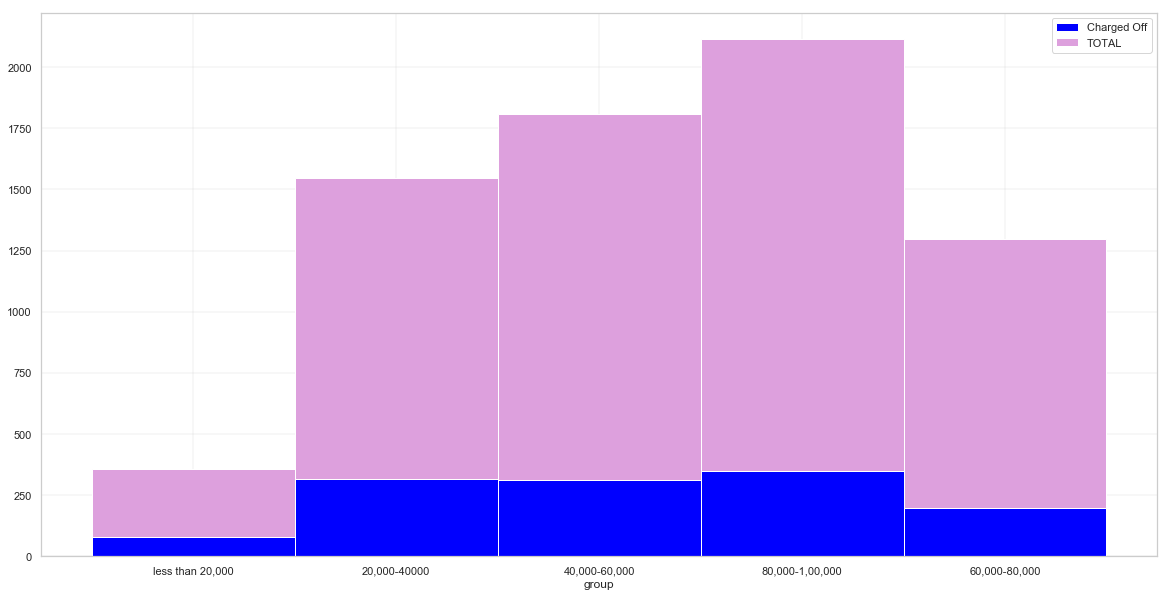

In [176]:
import matplotlib.pyplot as plt
# Create brown bars
plt.figure(figsize=(20,10))

Charged_Off=loan_inc_pvt_df['CHARGED OFF']
TOTAL= loan_inc_pvt_df['TOTAL']
Status=['Charged Off','TOTAL']
plt.bar(loan_inc_pvt_df['Status'],Charged_Off , color='blue', edgecolor='white', width=1)
# Create green bars (middle), on top of the firs ones
plt.bar(loan_inc_pvt_df['Status'],TOTAL, bottom=Charged_Off, color='plum', edgecolor='white', width=1)
# Custom X axis
plt.legend(Status)
plt.xlabel("group")

Text(0.5,0,'Income Group')

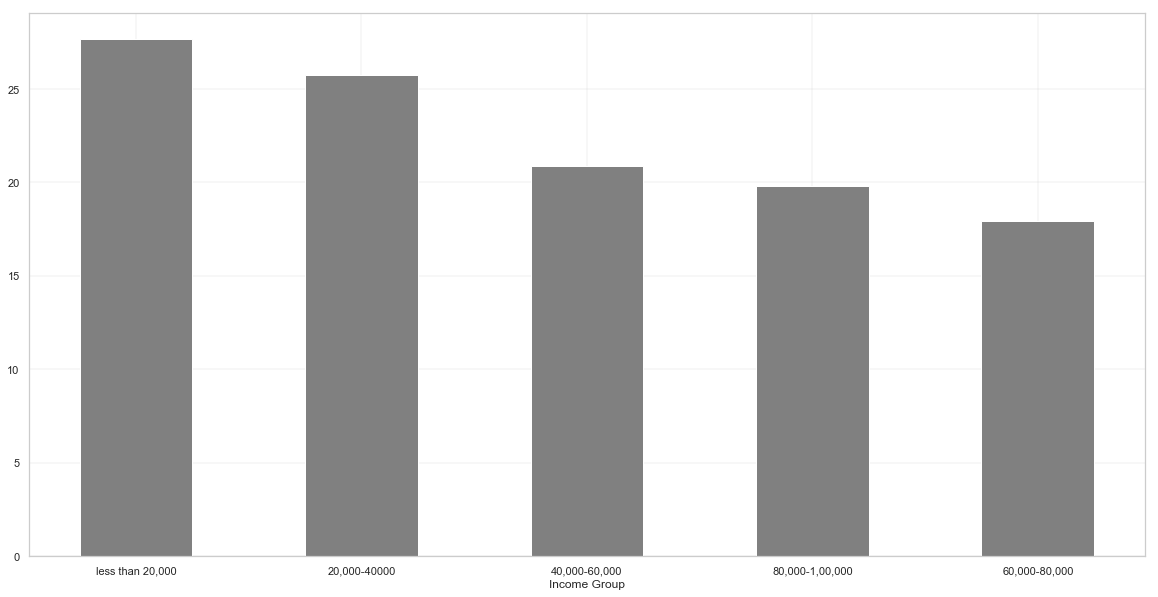

In [177]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

Fraud= loan_inc_pvt_df['FRAUD PERCENTAGE']

plt.bar(loan_inc_pvt_df['Status'],Fraud , color='grey', edgecolor='white', width=0.5)
# Custom X axis
plt.xlabel("Income Group")

#### Applicant's Loan Amount vs Loan Status

In [190]:
loan_amt_df = pd.DataFrame(loan_status_df.groupby(['loan_amnt','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_amt_df

,loan_amnt,loan_status,Number of Applicants
0,500,FULLY PAID,5
1,700,FULLY PAID,1
2,725,FULLY PAID,1
3,750,FULLY PAID,1
4,800,FULLY PAID,1
5,900,CHARGED OFF,1
6,900,FULLY PAID,1
7,950,FULLY PAID,1
8,1000,CHARGED OFF,46
9,1000,FULLY PAID,252


In [200]:

loan_amt_df.loc[loan_amt_df['loan_amnt']<=5000,'Range']='less than 5000'
loan_amt_df.loc[(loan_amt_df['loan_amnt']>5000) & (loan_amt_df['loan_amnt']<=10000),'Range']='5000-10,000'
loan_amt_df.loc[(loan_amt_df['loan_amnt']>10000) & (loan_amt_df['loan_amnt']<=15000),'Range']='10,000-15,000'
loan_amt_df.loc[(loan_amt_df['loan_amnt']>15000) & (loan_amt_df['loan_amnt']<=20000),'Range']='15000-20,000'
loan_amt_df.loc[(loan_amt_df['loan_amnt']>20000) & (loan_amt_df['loan_amnt']<=25000),'Range']='20,000-25,000'
loan_amt_df.loc[(loan_amt_df['loan_amnt']>25000),'Range']='more than 25,000'
loan_amt_df

,loan_amnt,loan_status,Number of Applicants,Range
0,500,FULLY PAID,5,less than 5000
1,700,FULLY PAID,1,less than 5000
2,725,FULLY PAID,1,less than 5000
3,750,FULLY PAID,1,less than 5000
4,800,FULLY PAID,1,less than 5000
5,900,CHARGED OFF,1,less than 5000
6,900,FULLY PAID,1,less than 5000
7,950,FULLY PAID,1,less than 5000
8,1000,CHARGED OFF,46,less than 5000
9,1000,FULLY PAID,252,less than 5000


In [201]:
loan_amtgrp_df = pd.DataFrame(loan_amt_df.groupby(['Range','loan_status']).size()).reset_index().rename(columns={0:'Number of Applicants'})
loan_amtgrp_df

,Range,loan_status,Number of Applicants
0,"10,000-15,000",CHARGED OFF,93
1,"10,000-15,000",FULLY PAID,176
2,"15000-20,000",CHARGED OFF,70
3,"15000-20,000",FULLY PAID,135
4,"20,000-25,000",CHARGED OFF,52
5,"20,000-25,000",FULLY PAID,91
6,"5000-10,000",CHARGED OFF,123
7,"5000-10,000",FULLY PAID,187
8,less than 5000,CHARGED OFF,102
9,less than 5000,FULLY PAID,157


In [202]:
loan_amt_pvt_df = pd.pivot_table(data=loan_amtgrp_df,columns='loan_status',values='Number of Applicants',index='Range').reset_index().rename_axis(None,axis=1)
loan_amt_pvt_df['TOTAL'] = loan_amt_pvt_df['CHARGED OFF'] + loan_amt_pvt_df['FULLY PAID']
loan_amt_pvt_df['FRAUD PERCENTAGE'] = loan_amt_pvt_df['CHARGED OFF']/loan_amt_pvt_df['TOTAL']*100
loan_amt_pvt_df = loan_amt_pvt_df.sort_values('FRAUD PERCENTAGE',ascending=False)
loan_amt_pvt_df

,Range,CHARGED OFF,FULLY PAID,TOTAL,FRAUD PERCENTAGE
3,"5000-10,000",123,187,310,39.677419
4,less than 5000,102,157,259,39.382239
2,"20,000-25,000",52,91,143,36.363636
5,"more than 25,000",47,85,132,35.606061
0,"10,000-15,000",93,176,269,34.572491
1,"15000-20,000",70,135,205,34.146341


Text(0.5,0,'group')

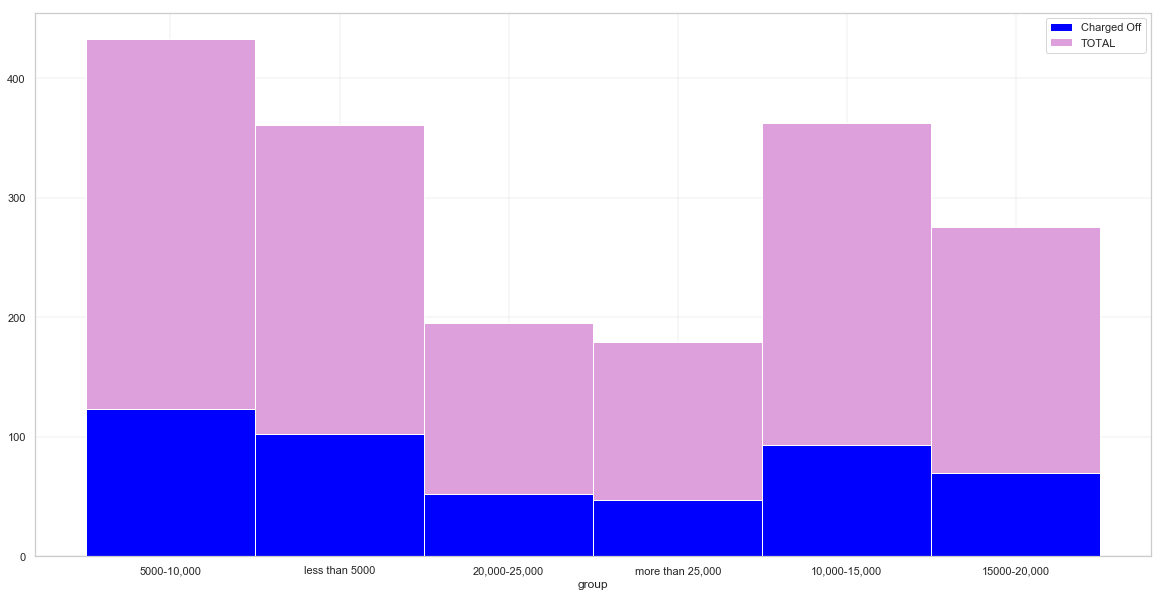

In [204]:
import matplotlib.pyplot as plt
# Create brown bars
plt.figure(figsize=(20,10))

Charged_Off=loan_amt_pvt_df['CHARGED OFF']
TOTAL= loan_amt_pvt_df['TOTAL']
Status=['Charged Off','TOTAL']
plt.bar(loan_amt_pvt_df['Range'],Charged_Off , color='blue', edgecolor='white', width=1)
# Create green bars (middle), on top of the firs ones
plt.bar(loan_amt_pvt_df['Range'],TOTAL, bottom=Charged_Off, color='plum', edgecolor='white', width=1)
# Custom X axis
plt.legend(Status)
plt.xlabel("group")